In [35]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as ny
from bindec import dec_to_bin, bin_to_dec
from PIL import Image
import imageio
import os

In [36]:
url=r"C:\Users\spectrumxking\Desktop\Project Final Sem\polly\elaine.tiff"
pic = cv.imread(url, cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original')

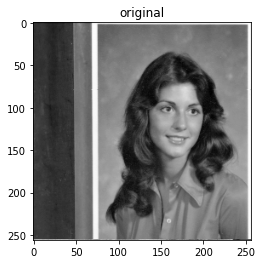

In [37]:
plt.imshow(pic,cmap="gray")
plt.title("original")


In [38]:
#readinf the image height and width
print(pic.shape)

(256, 256)


In [39]:
# converting original image into its 8bit binary form using binary_reper() 
lst=[]
for i in range (pic.shape[0]):
    for j in range (pic.shape[1]):
        lst.append(ny.binary_repr(pic[i][j], width=8))

In [40]:
# making the 8 bitplanes
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])

In [41]:
titles = ['original', 'bitplane8', 'bitplane7', 'bitplane6', 'bitplane5', 'bitplane4', 'bitplane3', 'bitplane2', 'bitplane1']
images = [pic, bitplane8, bitplane7, bitplane6, bitplane5, bitplane4, bitplane3, bitplane2, bitplane1]

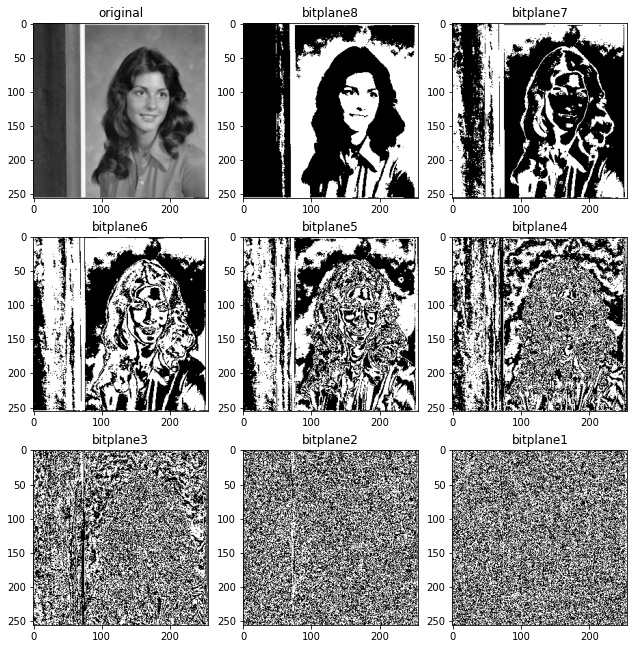

In [42]:
#showing the bitplanes into 3planes in a row.....
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [43]:
#each bitplanes in its binary form (saving by using index list)
bitplane8= (ny.array([int(i[0]) for i in lst] , dtype=ny.uint8)*128).reshape(pic.shape[0],pic.shape[1])
bitplane8.shape
print(lst[1])
bitplane7= (ny.array([int(i[1]) for i in lst] , dtype=ny.uint8)*64).reshape(pic.shape[0],pic.shape[1])
bitplane7.shape
print (lst[2])
bitplane6= (ny.array([int(i[2]) for i in lst] , dtype=ny.uint8)*32).reshape(pic.shape[0],pic.shape[1])
print (lst[3])
bitplane5= (ny.array([int(i[3]) for i in lst] , dtype=ny.uint8)*16).reshape(pic.shape[0],pic.shape[1])
print (lst[4])
bitplane4= (ny.array([int(i[4]) for i in lst] , dtype=ny.uint8)*8).reshape(pic.shape[0],pic.shape[1])
print (lst[5])
bitplane3= (ny.array([int(i[5]) for i in lst] , dtype=ny.uint8)*4).reshape(pic.shape[0],pic.shape[1])
print (lst[6])
bitplane2= (ny.array([int(i[6]) for i in lst] , dtype=ny.uint8)*2).reshape(pic.shape[0],pic.shape[1])
print (lst[7])
bitplane1= (ny.array([int(i[7]) for i in lst] , dtype=ny.uint8)*1).reshape(pic.shape[0],pic.shape[1])
print (lst[8])

00111000
00110111
00110111
00110110
00110110
00110011
00110100
00110111


In [70]:
#concatinate these image
conci = cv.hconcat([bitplane8, bitplane7])
convi = cv.hconcat([bitplane4, bitplane3])
final = cv.vconcat([conci,convi])


In [44]:
print(ny.array(pic).shape)

(256, 256)


In [55]:
# function to generate random number using arnold cat map formula
def arnold_cat_map(u, a):
    return u*a*(1-a)

In [67]:
def xor_matrix(matrix1, matrix2):
    return ny.bitwise_xor(matrix1, matrix2)

In [68]:
# getting cypher images for bitplane images up to its significance level
x = 0.78
y = 0.98
u = 3.57
cipher_images = []
for i in range(4):
    x, y, random_matrix = get_random_matrix(u, x, y, 256,256)
    cipher_image = xor_matrix(random_matrix, images[i+1])
    cipher_images.append(cipher_image)

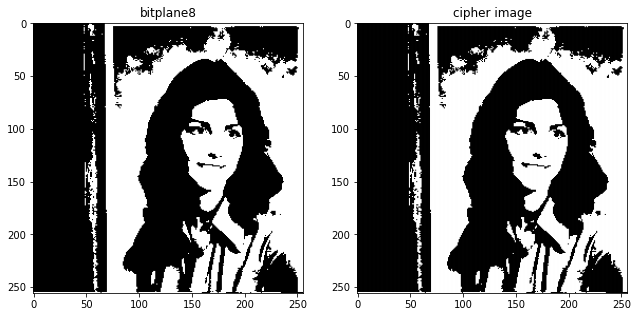

In [69]:
# displaying all cyper images
plt.subplot(1,2,1)
plt.title('bitplane8')
plt.imshow(images[1], cmap='gray')
plt.subplot(1,2,2)
plt.title('cipher image')
plt.imshow(cipher_images[0], cmap='gray')
plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)